In [118]:
import pandas as pd #biblioteca de dataframe 
%matplotlib inline 
import matplotlib.pyplot as plt #Para plotagem
import random

In [119]:
path = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsistas_ic.csv" #Endereço do csv

In [120]:
path

'D:\\UFOP\\Horas Complementares\\Projetos de Extensão\\IC\\Dataset\\bolsistas_ic.csv'

In [121]:
df = pd.read_csv(path,sep=';', encoding='UTF-8') # Conversão de CSV 


In [122]:
df.head() # Imprimindo as 5 primeiras linhas

,bolsista,curso_bolsista,programa,ano,orientador,setor,linha_pesquisa,id_projeto,título,fomento,tipo_bolsa
0,ADILSON DE BARROS MARTINS,FARMACIA,PROGRAMA DE BOLSAS DE INICIAÇÃO CIENTÍFICA E T...,2017,CLAUDIA MARTINS CARNEIRO,DEACL,NaN,2590,Avaliação da eficácia de novas estratégias ter...,FAPEMIG,BOLSISTA
1,ALINE TONHELA FERRAZ,FARMACIA,PROGRAMA DE BOLSAS DE INICIAÇÃO CIENTÍFICA E T...,2017,PAULA MELO DE ABREU VIEIRA,DECBI,OBJETIVOS: NESTA LINHA DE PESQUISA TEMOS COMO ...,2487,Quantificação do parasistismo no trato gastroi...,FAPEMIG,BOLSISTA
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,PROGRAMA INSTITUCIONAL DE VOLUNTÁRIOS DE INICI...,2017,HARRISON BACHION CERIBELI,DECEG,EMENTA: MÚLTIPLAS DIMENSÕES DO PROCESSO ESTRAT...,2626,Produtos e serviços turísticos para a criança ...,UFOP,VOLUNTÁRIO
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,PROGRAMA INSTITUCIONAL DE VOLUNTÁRIOS DE INICI...,2017,LUCCAS ASSIS ATTILIO,DECEG,EMENTA: O OBJETIVO DESSA LINHA DE PESQUISA É D...,2774,Financeirização e crescimento econômico brasil...,UFOP,VOLUNTÁRIO
4,ANA CAROLINA DA SILVA,TURISMO,PROGRAMA INSTITUCIONAL DE VOLUNTÁRIOS DE INICI...,2017,MARCELO VIANA RAMOS,DETUR,GESTÃO E PLANEJAMENTO DO TURISMO,3200,URBANIZAÇÃO TURÍSTICA NO CONTEXTO DOS MEGA-EVE...,UFOP,VOLUNTÁRIO


In [123]:
df.dropna(inplace = True) # Descartando colunas com valor nulo para evitar erros


In [124]:
df.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 1 to 3790
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bolsista        3581 non-null   object
 1   curso_bolsista  3581 non-null   object
 2   programa        3581 non-null   object
 3   ano             3581 non-null   int64 
 4   orientador      3581 non-null   object
 5   setor           3581 non-null   object
 6   linha_pesquisa  3581 non-null   object
 7   id_projeto      3581 non-null   int64 
 8   título          3581 non-null   object
 9   fomento         3581 non-null   object
 10  tipo_bolsa      3581 non-null   object
dtypes: int64(2), object(9)
memory usage: 335.7+ KB


In [125]:
df.shape #Tamanho da base de dados

(3581, 11)

In [126]:
df.columns #Saber o nome das colunas

Index(['bolsista', 'curso_bolsista', 'programa', 'ano', 'orientador', 'setor',
       'linha_pesquisa', 'id_projeto', 'título', 'fomento', 'tipo_bolsa'],
      dtype='object')

In [127]:
df.describe() #Estatistica Geral do dataframe


,ano,id_projeto
count,3581.000000,3581.000000
mean,2019.195197,5478.063111
std,1.372572,1703.265563
min,2017.000000,2326.000000
25%,2018.000000,3981.000000
50%,2019.000000,5617.000000
75%,2020.000000,6948.000000
max,2021.000000,8503.000000


In [128]:
df.tail() #Imprime as 5 ultimas linhas do Dataframe

,bolsista,curso_bolsista,programa,ano,orientador,setor,linha_pesquisa,id_projeto,título,fomento,tipo_bolsa
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO ...,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR EM DIFERENTES ESP...,7722,COVID-19 E ESCOLARIZAÇÃO: O QUE MUDA NO PROCES...,CNPQ,BOLSISTA
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,TEM COMO OBJETIVO INVESTIGAR AS DIVERSAS PRÁTI...,7063,Contribuições da Metodologia de Produções Narr...,UFOP,BOLSISTA
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,ANELISE FONSECA DUTRA (DELET),DELET,ESTA LINHA INCORPORA A LINGUÍSTICA APLICADA EM...,7045,Teletandem: o desenvolvimento da competência i...,UFOP,BOLSISTA
3790,ALICE SILVEIRA DA SILVA,LETRAS PORTUGUES,PROGRAMA DE INICIAÇÃO À PESQUISA - 1º SEMESTRE,2021,ANELISE FONSECA DUTRA (DELET),DELET,ESTA LINHA INCORPORA A LINGUÍSTICA APLICADA EM...,7045,Teletandem: o desenvolvimento da competência i...,UFOP,BOLSISTA


In [129]:
df['ano'].min() #menor data do dataframe

2017

In [130]:
df['ano'].max() #maior data do dataframe


2021

In [131]:
df['tipo_bolsa'].replace("VOLUNTARIO", "VOLUNTÁRIO", inplace=True) # alterando valores da coluna

In [132]:
df['tipo_bolsa'].value_counts() #contar quantidade de alunos por tipo de bolsa

BOLSISTA      2204
VOLUNTÁRIO    1377
Name: tipo_bolsa, dtype: int64

In [133]:
df['tipo_bolsa'].value_counts(normalize=True) * 100 #porcentagem de alunos por tipo de bolsa

BOLSISTA      61.547054
VOLUNTÁRIO    38.452946
Name: tipo_bolsa, dtype: float64

In [136]:
df.drop(['programa', 'linha_pesquisa', 'id_projeto', 'título'], axis=1, inplace=True) #removendo colunas que não serão usadas

In [137]:
df

,bolsista,curso_bolsista,ano,orientador,setor,fomento,tipo_bolsa
1,ALINE TONHELA FERRAZ,FARMACIA,2017,PAULA MELO DE ABREU VIEIRA,DECBI,FAPEMIG,BOLSISTA
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,HARRISON BACHION CERIBELI,DECEG,UFOP,VOLUNTÁRIO
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,LUCCAS ASSIS ATTILIO,DECEG,UFOP,VOLUNTÁRIO
4,ANA CAROLINA DA SILVA,TURISMO,2017,MARCELO VIANA RAMOS,DETUR,UFOP,VOLUNTÁRIO
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,GUSTAVO PEIXOTO SILVA,DECOM,UFOP,VOLUNTÁRIO
...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,CNPQ,BOLSISTA
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,ANELISE FONSECA DUTRA (DELET),DELET,UFOP,BOLSISTA


In [138]:
df.columns = ['Bolsista','Curso','Ano','Orientador','Setor','Fomento','Tipo de Aluno'] #Renomeando colunas

In [139]:
df


,Bolsista,Curso,Ano,Orientador,Setor,Fomento,Tipo de Aluno
1,ALINE TONHELA FERRAZ,FARMACIA,2017,PAULA MELO DE ABREU VIEIRA,DECBI,FAPEMIG,BOLSISTA
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,HARRISON BACHION CERIBELI,DECEG,UFOP,VOLUNTÁRIO
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,LUCCAS ASSIS ATTILIO,DECEG,UFOP,VOLUNTÁRIO
4,ANA CAROLINA DA SILVA,TURISMO,2017,MARCELO VIANA RAMOS,DETUR,UFOP,VOLUNTÁRIO
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,GUSTAVO PEIXOTO SILVA,DECOM,UFOP,VOLUNTÁRIO
...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,CNPQ,BOLSISTA
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,ANELISE FONSECA DUTRA (DELET),DELET,UFOP,BOLSISTA


In [142]:
#Inserindo coluna para contagem para facilitar nas análises
df['Contagem'] = 1

In [143]:
df

,Bolsista,Curso,Ano,Orientador,Setor,Fomento,Tipo de Aluno,CONTAGEM,Contagem
1,ALINE TONHELA FERRAZ,FARMACIA,2017,PAULA MELO DE ABREU VIEIRA,DECBI,FAPEMIG,BOLSISTA,1,1
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,HARRISON BACHION CERIBELI,DECEG,UFOP,VOLUNTÁRIO,1,1
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,LUCCAS ASSIS ATTILIO,DECEG,UFOP,VOLUNTÁRIO,1,1
4,ANA CAROLINA DA SILVA,TURISMO,2017,MARCELO VIANA RAMOS,DETUR,UFOP,VOLUNTÁRIO,1,1
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,GUSTAVO PEIXOTO SILVA,DECOM,UFOP,VOLUNTÁRIO,1,1
...,...,...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,CNPQ,BOLSISTA,1,1
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA,1,1
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA,1,1
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,ANELISE FONSECA DUTRA (DELET),DELET,UFOP,BOLSISTA,1,1


In [146]:
df.drop(['CONTAGEM'], axis=1, inplace=True) #removendo colunas duplicadas

In [148]:
df

,Bolsista,Curso,Ano,Orientador,Setor,Fomento,Tipo de Aluno,Contagem
1,ALINE TONHELA FERRAZ,FARMACIA,2017,PAULA MELO DE ABREU VIEIRA,DECBI,FAPEMIG,BOLSISTA,1
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,HARRISON BACHION CERIBELI,DECEG,UFOP,VOLUNTÁRIO,1
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,LUCCAS ASSIS ATTILIO,DECEG,UFOP,VOLUNTÁRIO,1
4,ANA CAROLINA DA SILVA,TURISMO,2017,MARCELO VIANA RAMOS,DETUR,UFOP,VOLUNTÁRIO,1
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,GUSTAVO PEIXOTO SILVA,DECOM,UFOP,VOLUNTÁRIO,1
...,...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,MARCO ANTONIO MELO FRANCO (DEEDU),DEEDU,CNPQ,BOLSISTA,1
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA,1
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,MARCELO LOURES DOS SANTOS (DEEDU),DEEDU,UFOP,BOLSISTA,1
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,ANELISE FONSECA DUTRA (DELET),DELET,UFOP,BOLSISTA,1


In [145]:
#Cores para serem usadas nos gráficos
colors = [['#AFB0D4','#8589FB','#CFD1FA','#41437A','#A5A6C7'],
          ['#E2C5FD','#BC78FB','#DFC3FA','#5C3B7A','#B29BC7'],
          ['#AAFAC6','#5FFB96','#AAFAC6','#2F7A49','#87C79E']
         ]

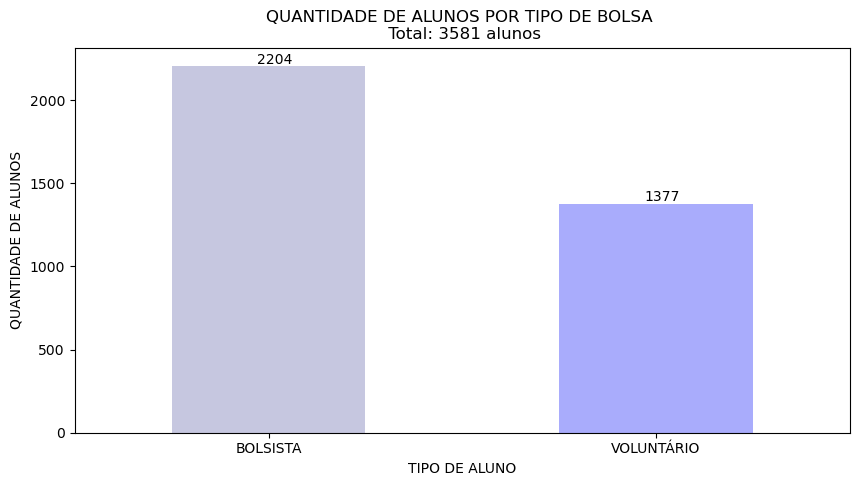

In [151]:
grafico = df.groupby('Tipo de Aluno')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico.patches:
    b=p.get_bbox()
    grafico.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('TIPO DE ALUNO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR TIPO DE BOLSA \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.show()

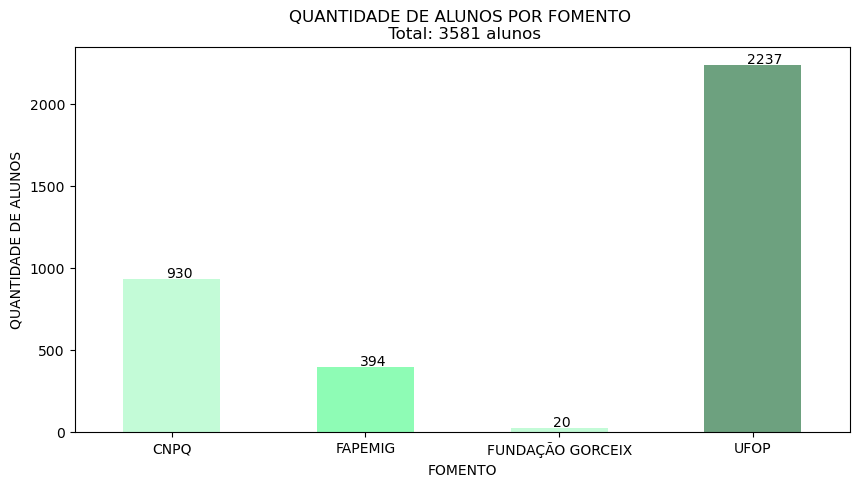

In [152]:
grafico = df.groupby('Fomento')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico.patches:
    b=p.get_bbox()
    grafico.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('FOMENTO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR FOMENTO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.show()

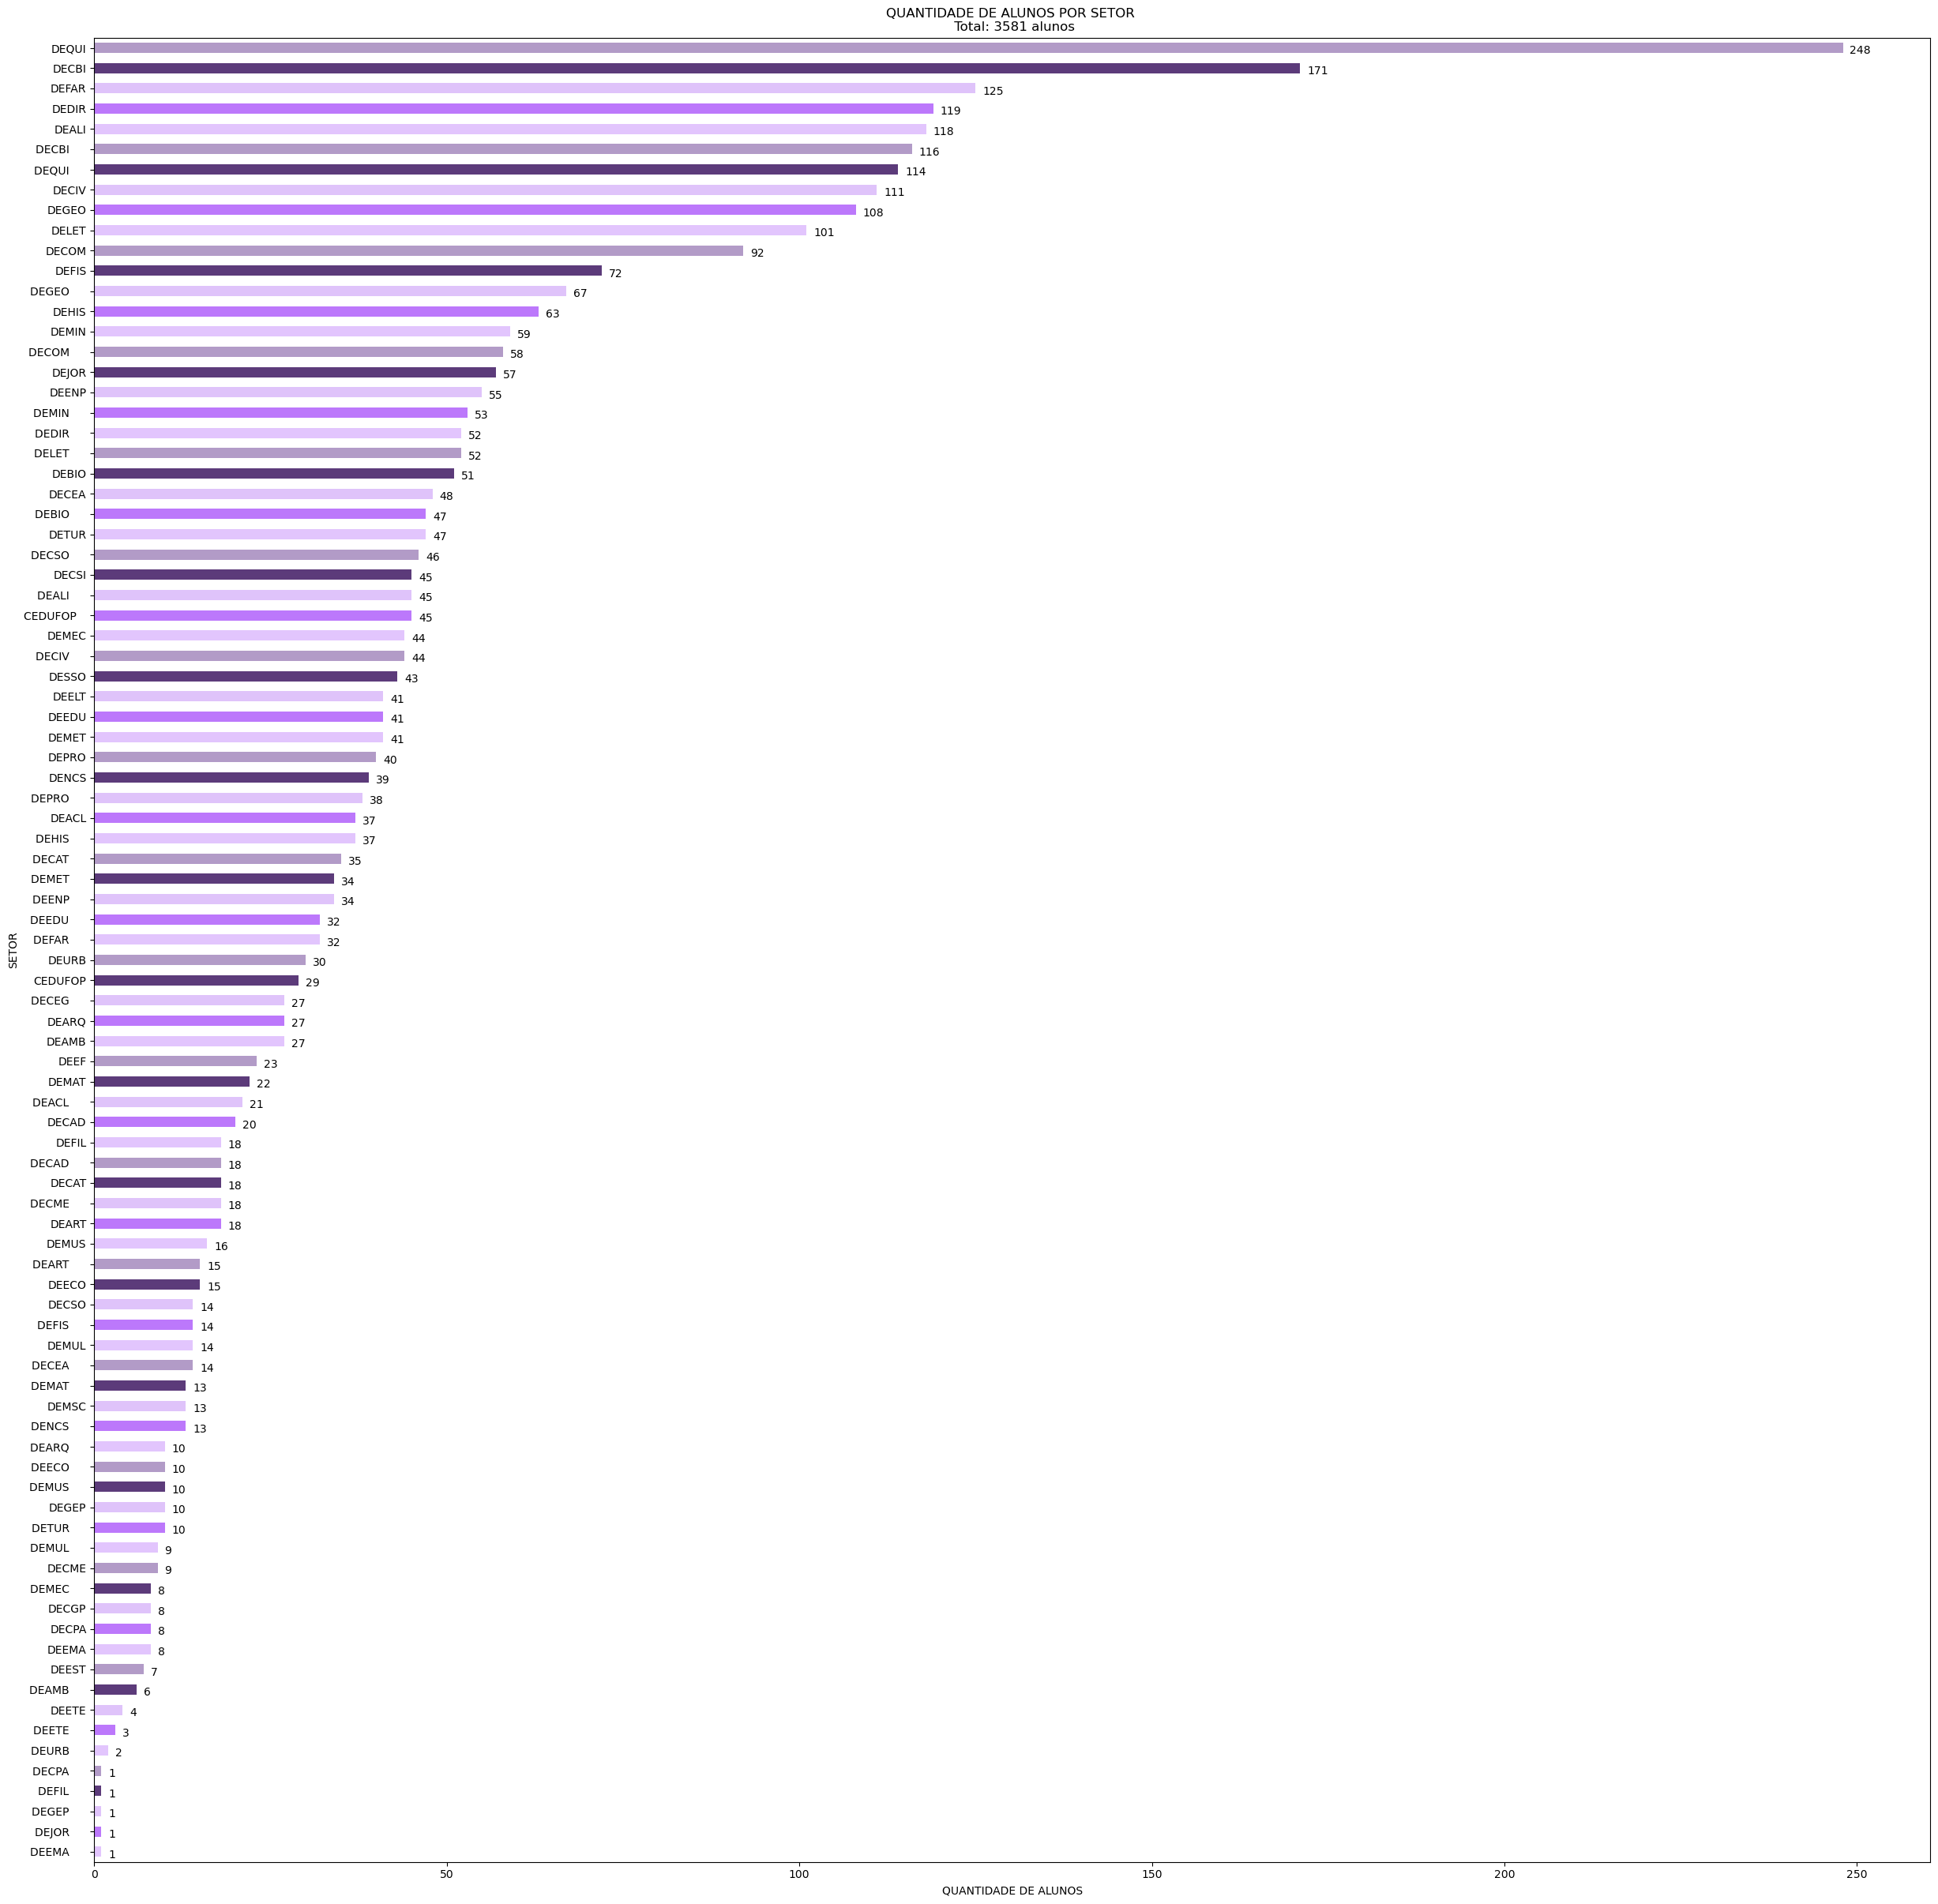

In [160]:
histograma = df.groupby('Setor')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma.patches:
    b=p.get_bbox()
    histograma.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR SETOR \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.ylabel('SETOR')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

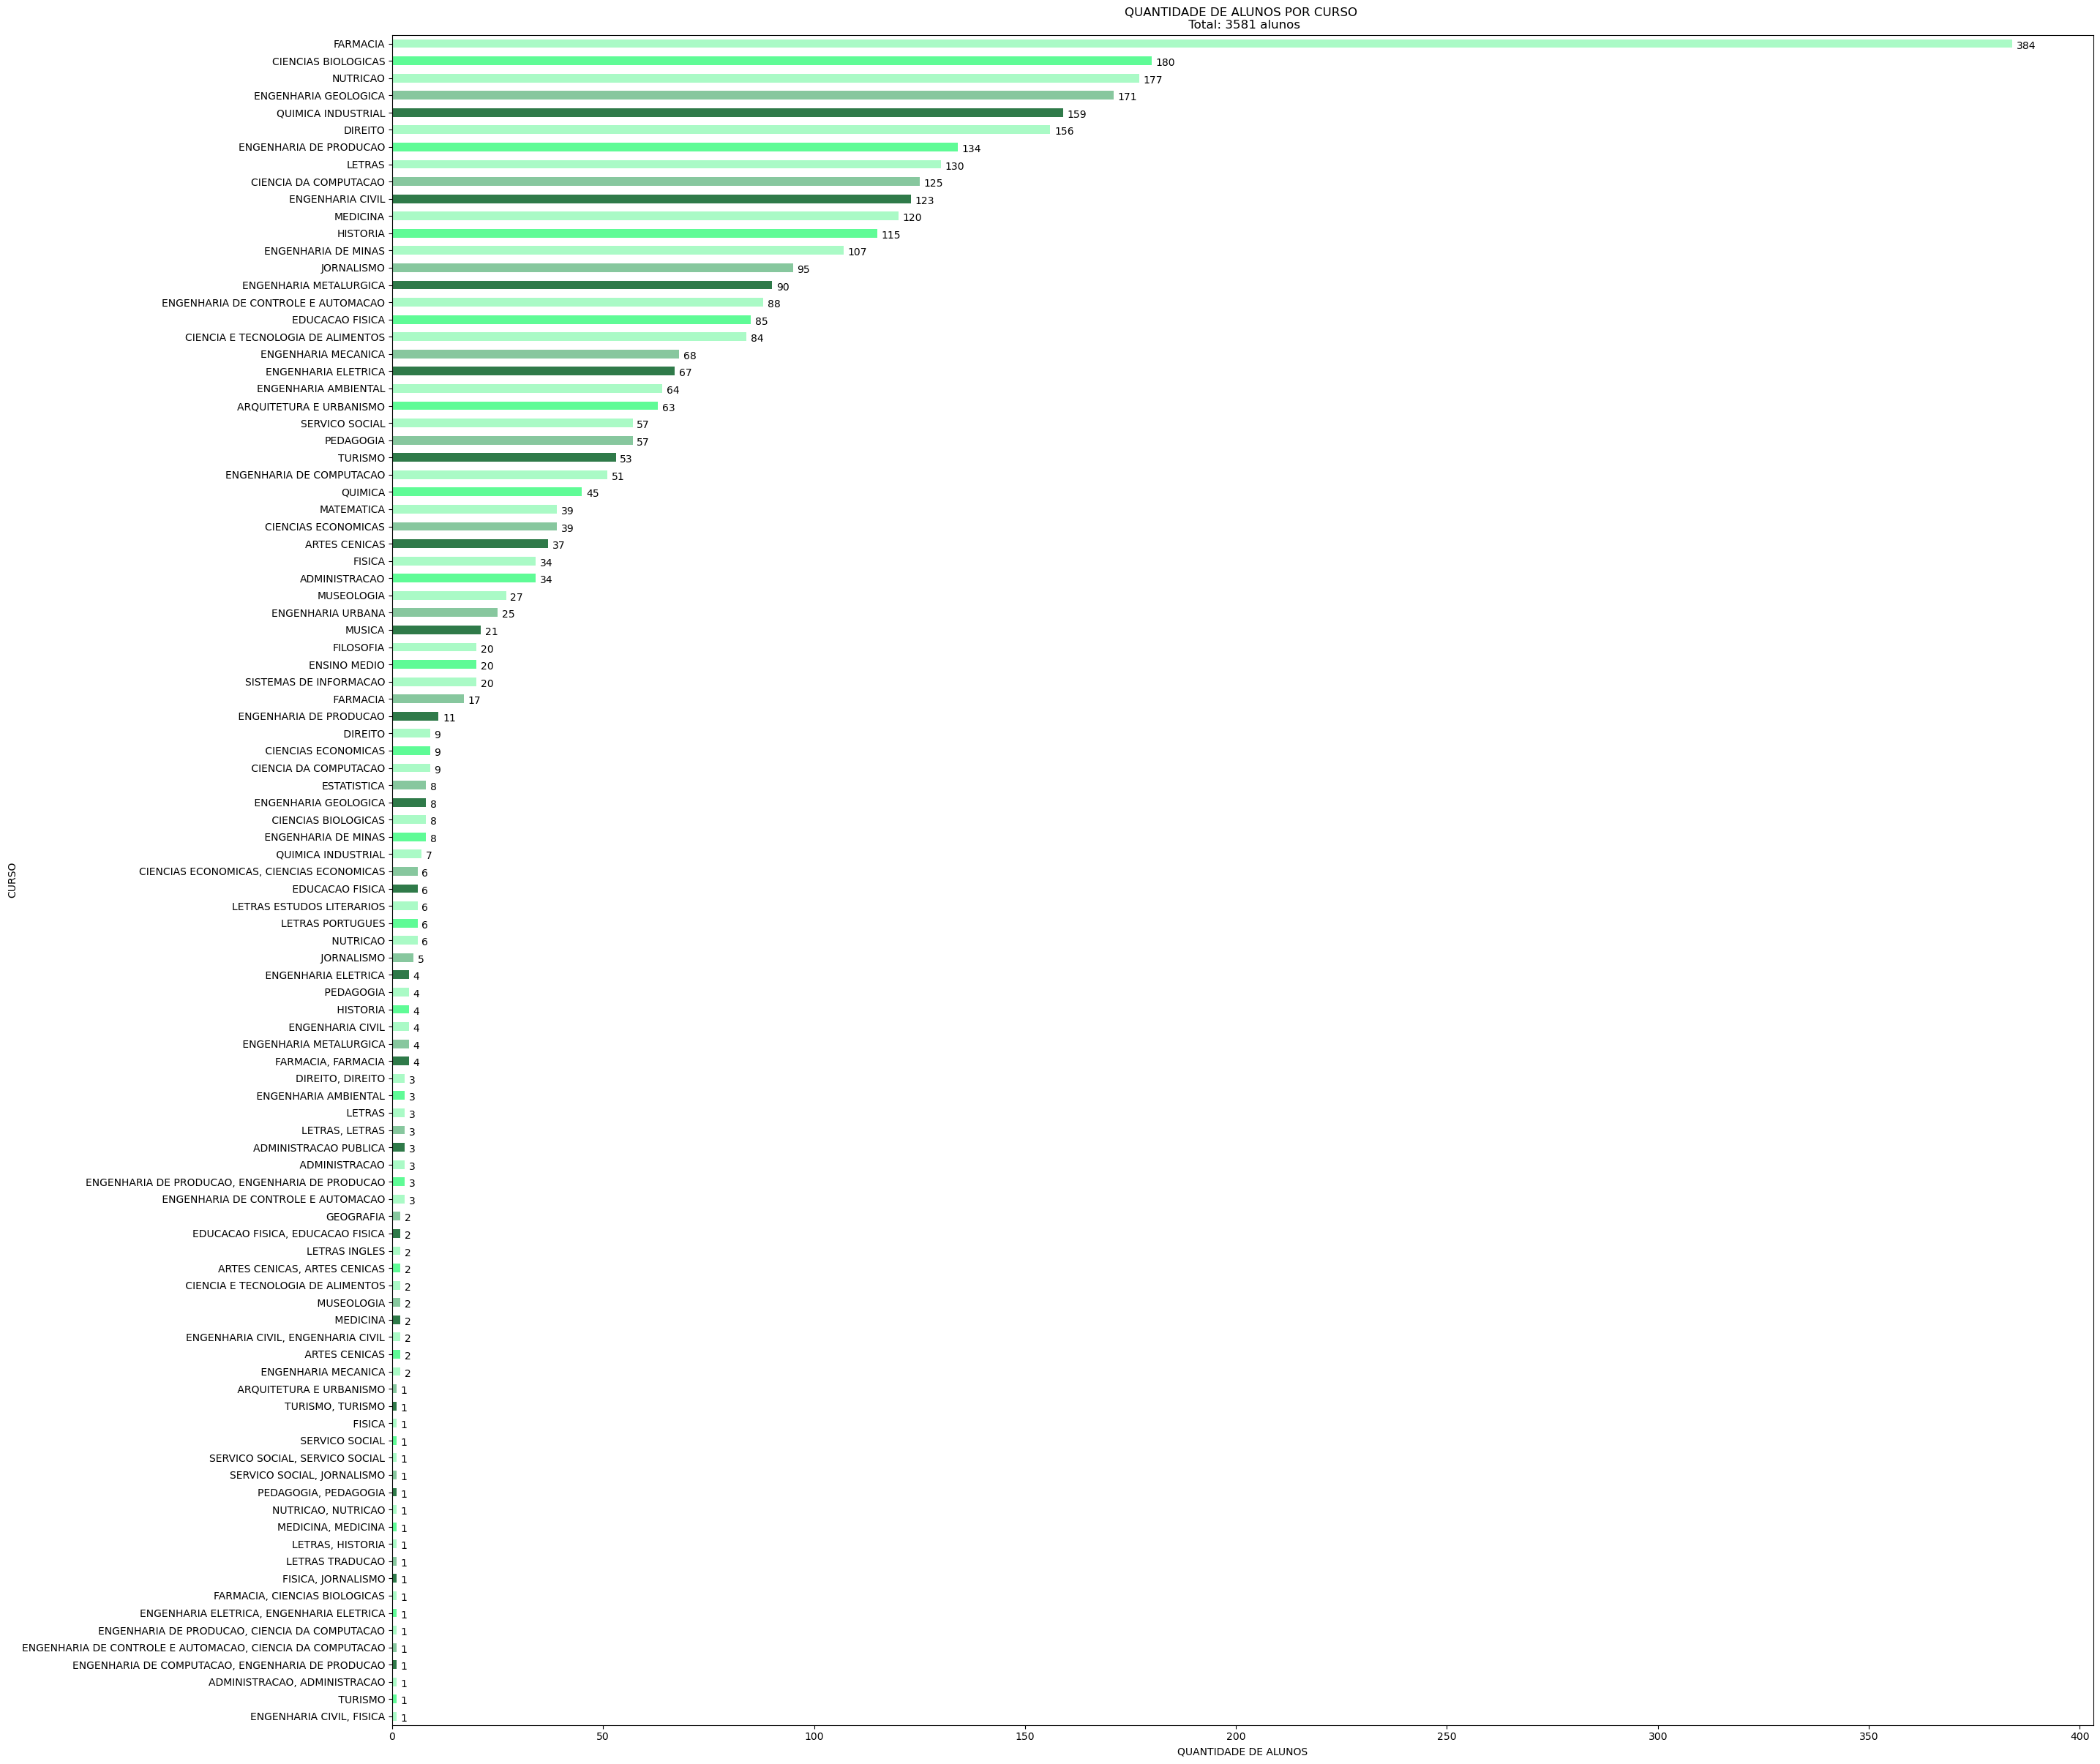

In [161]:
histograma = df.groupby('Curso')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma.patches:
    b=p.get_bbox()
    histograma.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR CURSO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.ylabel('CURSO')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

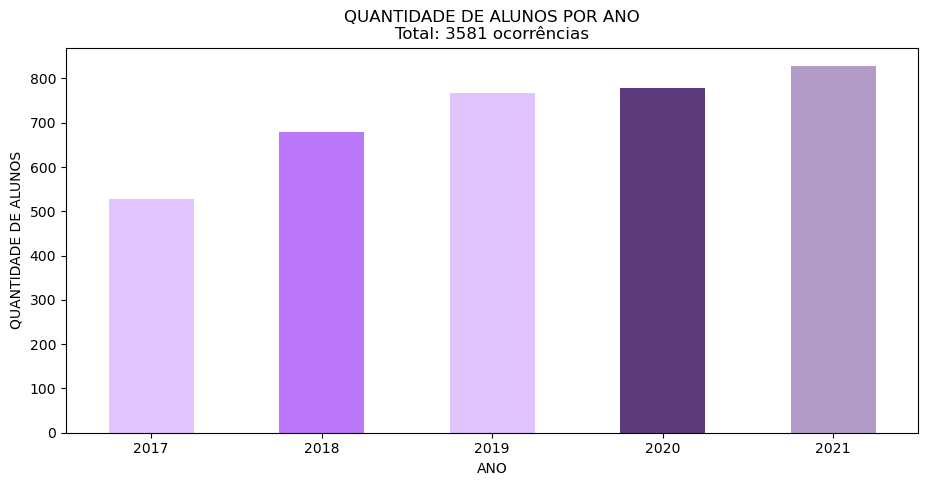

In [179]:
barras =  df.groupby('Ano')['Contagem'].sum().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR ANO\nTotal: ' + str(df['Contagem'].sum()) + ' ocorrências')
plt.xticks(rotation=0)
plt.show()